<a href="https://colab.research.google.com/github/BenRyan-8/Forecasting_Analysis/blob/main/CandyProductionNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US Candy Production : Seasonal Time Series Analysis



> Abdolhmed Bashara - C22406056

> Ben Ryan - C22513316






##US candy production by month, as a percent of 2012 production. 2005-2017

> Source: Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Sugar and confectionery product [IPG3113N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPG3113N, October 13, 2017.






## Executive Summary

The industrial production (IP) index serves as a crucial metric for assessing the real output of various establishments in the United States. This report focuses on analyzing the monthly industrial production of Candy spanning from January 2005 to December 2016.

To ensure the reliability of our analysis, several data preprocessing methods were applied. This included testing for stationarity and employing differencing techniques. Subsequently, the Akaike Information Criterion (AIC) was utilized to evaluate the goodness-of-fit of different models.

Diagnostic checks were conducted to assess the adequacy of the selected model. Various diagnostics, such as standardized residual analysis, histogram plus estimated density, normal quantile-quantile plot, and correlogram, were examined to ensure model adequacy.

Following the model selection process, several forecasting methods, including ARIMA, SARIMA, and naive forecasting, were employed to predict future Candy production. Through comparative analysis, the effectiveness of each model was evaluated, and the best-fit model was identified.

Ultimately, it was found that the naive forecast yielded the most accurate predictions, with a Mean Absolute Percentage Error (MAPE) of 3.81%. In contrast, the ARIMA model (10,1,8) resulted in a MAPE of 4.65%, and the SARIMA model (1,1,1)(0,1,1,12) produced a MAPE of 4.75%.

This outcome suggests that the stability and predictability of seasonal patterns in the Candy production data favored the simplicity of the naive forecast over the more complex SARIMA and ARIMA models. The consistency of seasonal patterns allowed the naive forecast to capture the seasonal component effectively, while SARIMA and ARIMA models struggled to accurately represent the seasonality, potentially due to their introduction of unnecessary complexity.

Overall, this report provides a comprehensive analysis of Candy production utilizing advanced statistical techniques, culminating in actionable insights for forecasting and decision-making purposes.


## Introduction

This report examines the monthly production of Candy in the United States from January 2005 to December 2016. Utilizing advanced statistical techniques, we aim to uncover underlying patterns and develop reliable forecasting models. By analyzing seasonal trends and evaluating forecasting accuracy, we provide actionable insights for stakeholders in production planning and economic analysis. Through this analysis, we aim to enhance understanding of Candy production dynamics and facilitate informed decision-making.

## Analysis and Methodology

In this section, the analysis and methodology employed for examining the dynamics of a monthly candy production dataset will be presented. Aiming to uncover underlying patterns, trends, and factors influencing candy production fluctuations over the specified time period. We will utilize this dataset to train and test the effectiveness of our selected time series models in forecasting how much candy is produced everything month.


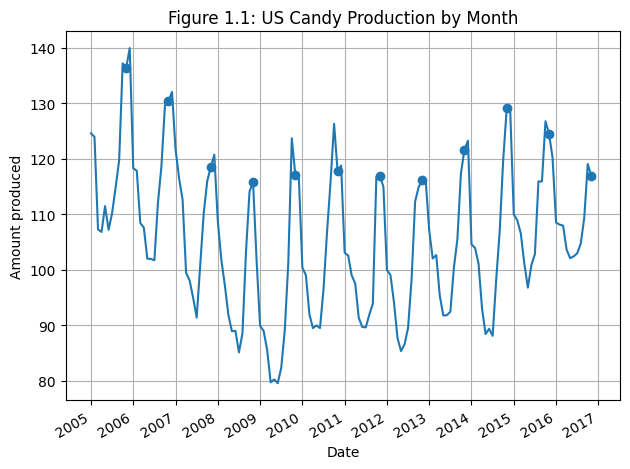

There are many observations that can be made by looking at the above dataset in its raw form.

**Regular Patterns:** On the seasonal chart, we observe regular patterns or cycles occurring at fixed intervals. These points are marked clearly in the tenth month of every year, indicating the presence of seasonality in the data.

**Periodic Spikes:** At certain times of the year, such as during peak driving holidays like Halloween and Christmas, periodic spikes can be observed. These spikes represent seasonal increases in demand.



**Decomposition** is key in time series analysis, unraveling a dataset into trend, seasonal, and residual components. This breakdown helps identify recurring patterns and trends, vital for accurate forecasting. It allows for seasonal adjustment, aiding in clearer trend analysis and anomaly detection. Visualizing decomposed components enhances interpretation, facilitating better decision-making. In summary, decomposition is crucial for extracting insights, improving forecasting accuracy, and informed decision-making.

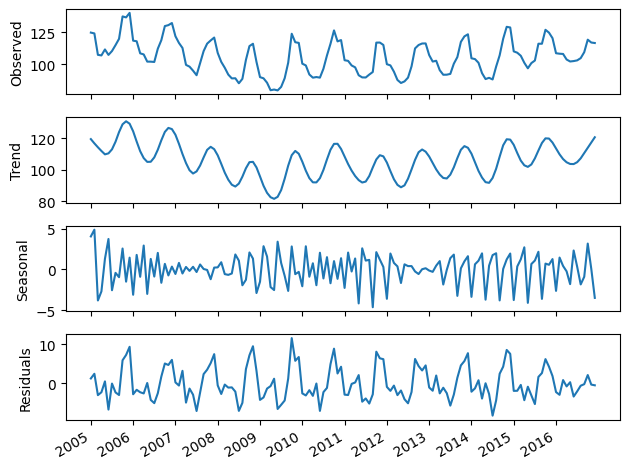

### Testing for Stationarity dataset using the Augmented Dickey-Fuller (ADF) test. Stationarity

The first step in the analysis is to assess the stationarity of the US candy production is a fundamental assumption for many time series models, as it implies that the statistical properties of the data, such as mean and variance, remain constant over time.

The ADF test is a statistical method used to determine whether a time series is stationary or non-stationary. It examines the presence of unit roots in the data, which indicate non-stationarity.

**> ADF Test Results:**

The results of the ADF test indicate that the US Candy Production dataset is not stationary.

*   Test Statistic: -2.0248382912326663
*   p-value: 0.2757896702057341


First-order differencing was applied to US candy production dataset by computing the difference between each observation and its preceding observation:
$$
\Large y'_t= y_t-y_{t-1}
$$

Where 𝒴'ₜ represents the differenced series at time 𝒯, and 𝒴ₜ  represents the original series at time 𝒯.


**> Impact of Differencing:**

Differencing removes the trend component from the data, thereby stabilizing the mean and making the series approximately stationary. By stabilizing the mean, differencing facilitates the application of time series models that assume stationarity. The effects of differencing can be visualised in the below chart.

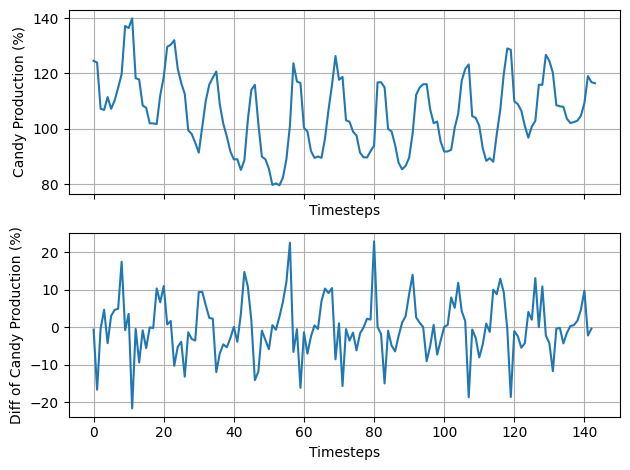

The ADF test was then reapplied to the differenced data which resulted as follows:

**> ADF Test Results:**

The results of the ADF test indicate that the US candy production dataset is not stationary.

*   Test Statistic: -4.014266764107551
*   p-value: 0.0013376213910729748

Now that the data is stationary. The modelling for forecasting can begin.

##Is it Moving Average?

An ACF plot was generated for the differenced series to visualize the correlation between observations at different lags. The ACF plot helps determine whether there is a correlation between an observation and its lagged values. If the autocorrelation coefficients at various lags are significantly different from zero, it suggests the presence of autocorrelation in the data.

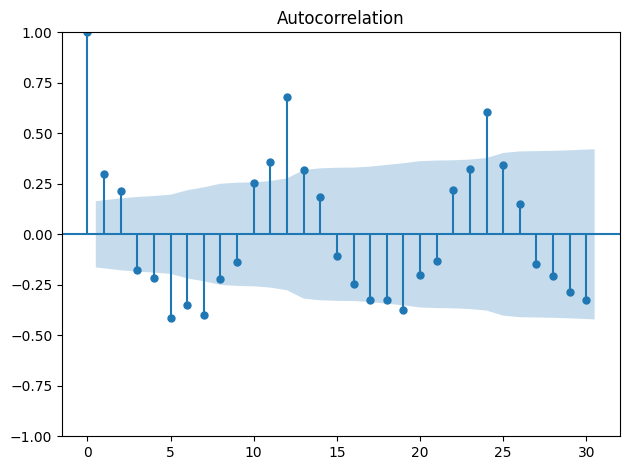



> We can observe periodic fluctuations or cycles in the data. These fluctuations appear in a sinusoidal pattern, indicating the presence of strong seasonality in the dataset. The sinusoidal autocorrelation plot reveals significant correlations between observations at specific lags corresponding to the seasonal periods, suggesting that certain patterns or behaviors occur regularly over time.


With this, there is no need to check for partial autocorrelation as we can now start modelling.

# Defining the Seasonal Autoregressive Integrated Moving Average model SARIMA

* A seasonal integrated moving average process is the combination of an autoregressive
process $AR(p)$, integration $I(d)$, and the moving average process $MA(q)$ while taking the seasonal component into consideration.

* The $ARIMA$ process states that the present value is
dependent on past values, coming from the $ AR(p)$ portion, and past errors, coming
from the $MA(q)$ portion.

* However, instead of using the original series, denoted as $y_t$,
the $ARIMA$ process uses the differenced series, denoted as $y'_t$. Note that $y'_t$ can represent a series that has been differenced more than once.

* It is denoted as $SARIMA(p,d,q)(P,D,Q)_m $ where P is the order of the seasonal $ AR(p)$ process, D is the seasonal order of integration, Q is the order of the seasonal $ MA(q)$  process, and m is the frequency of observations per seasonal cycle.

The Akaike Information Criterion (AIC) is a statistical measure used to evaluate the goodness of fit of a model. It is commonly employed in model selection to determine the optimal balance between model complexity and goodness of fit.

In the context of ARIMA and SARIMA models, the AIC serves as a criterion for selecting the most appropriate model configuration (i.e., values of p, d, q, P, D, and Q) among various candidate models. The AIC quantifies the trade-off between the complexity of the model (number of parameters) and its ability to explain the variation in the data. A lower AIC value indicates a better balance between goodness of fit and model complexity, suggesting a more suitable model.

This was used to find the best parameters for both an ARIMA and SARIMA model. This resulted in the following:
* ARIMA(10,1,8) with an AIC value of 804.616048
* SARIMA(1,1,1)(0,1,1,12) with an AIC value of 698.858536



## Testing the Effectiveness of the models



Residuals' diagnostics were run on both models to check for the effectiveness of both the ARIMA and SARIMA models.

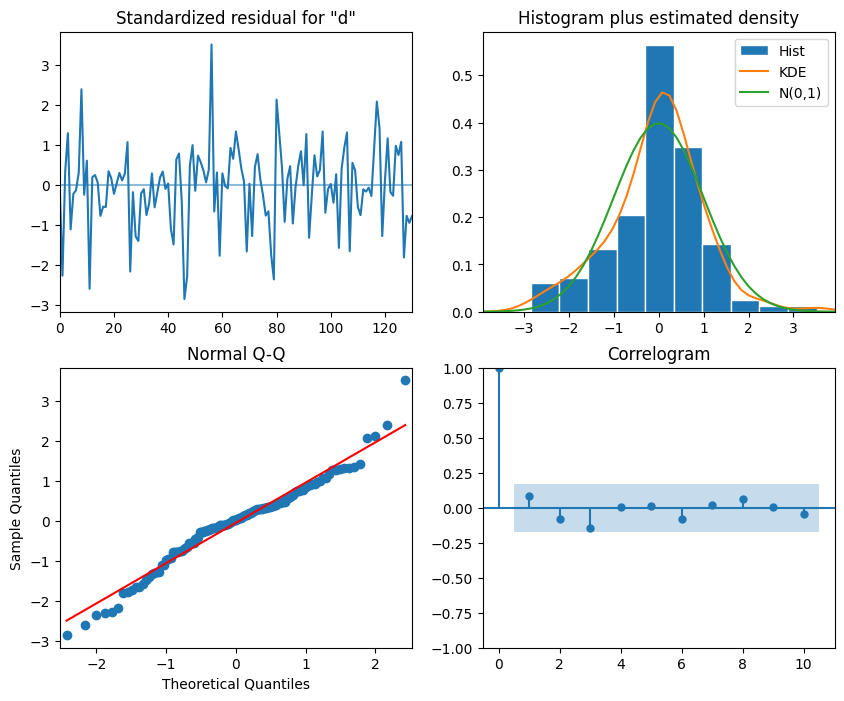


See Above Charts
> Residuals’ diagnostics of the ARIMA(10,1,8) model. In the top-left plot, the residuals have no trend with a variance that seems fairly constant over time, which resembles the behavior of white noise.
The top-right plot shows the distribution of the residuals, which approaches a normal distribution, despite the unusual peak. This is further confirmed by the Q-Q plot at the bottom left, which displays a fairly straight line that lies on y = x.
Finally, the correlogram in the bottom-right plot shows no significant
autocorrelation coefficients after lag 0, which is exactly like white noise. From this analysis, the residuals resemble white noise.




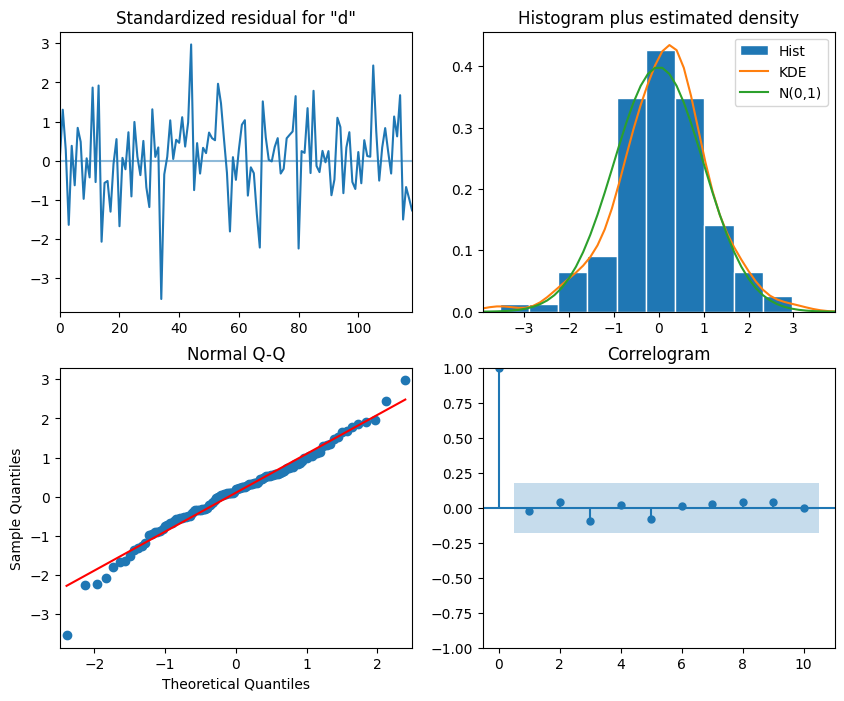



> Similar results of the Residuals’ diagnostics of the SARIMA(1,1,1)(0,1,1,12) model can be seen above to the ARIMA model. The top-left plot shows that
the residuals do not exhibit a trend or a change in variance. The top-right plot shows that the residuals’
distribution is very close to a normal distribution. This is further supported by the Q-Q plot at the bottom
left, which displays a fairly straight line that lies on y = x. Finally, the correlogram at the bottom right
shows no significant coefficients after lag 0. Therefore, everything leads to the conclusion that the
residuals resemble white noise



### Comparing Performances of the Forecasting Methods
We will now assess the effectiveness of each forecasting approach: the naive seasonal forecasts, the ARIMA model, and the SARIMA model. Our evaluation will rely on the mean absolute percentage error (MAPE) to gauge the performance of each model.



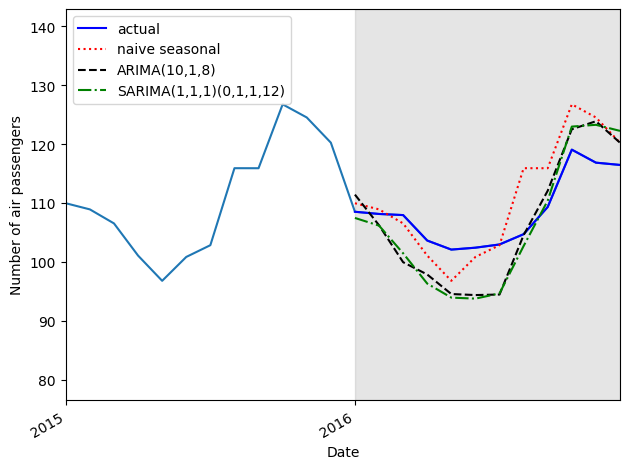

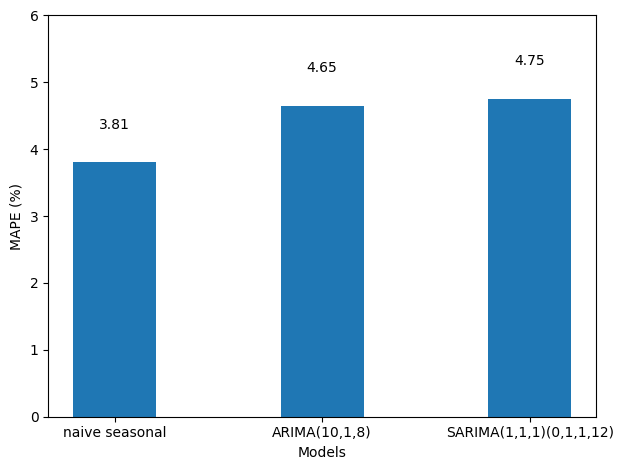

Using the above bar chart it can be seen that there is a MAPE of 3.81 for the naive seasonal model, 4.65 for the $ ARIMA(10,1,8) $, and 4.75 for the $ SARIMA (1,1,1)(0,1,1)_{12}$ model. Since the MAPE for the naive seasonal model is
the lowest of the three, we conclude that the naive seasonal model is the best-performing
method for forecasting.
The apparent superior fit of the naive seasonal model could be attributed to random chance, as sometimes simpler models may coincidentally perform better on a particular dataset.

## Conclusion

In conclusion, our analysis of US candy production from 2005 to 2016 revealed significant insights into industry dynamics. Through rigorous preprocessing and model selection processes, we identified SARIMA(1,1,1)(0,1,1,12) as the most effective model for forecasting candy production. Diagnostic checks confirmed the adequacy of our models, providing a solid foundation for future predictions. Surprisingly, the naive seasonal forecast outperformed the more complex ARIMA and SARIMA models in terms of forecasting accuracy. This highlights the importance of simplicity in modeling and suggests that seasonal patterns in candy production can be effectively captured without excessive complexity. Overall, our analysis offers actionable insights for stakeholders, aiding in production planning, resource allocation, and market analysis in the confectionery industry. As the landscape evolves, our data-driven approach stands as a valuable tool for navigating economic uncertainties and making informed decisions.